<a href="https://colab.research.google.com/github/mtcarilli/GCCP_2022/blob/main/standalone_monod_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --branch nn-integration https://github.com/pachterlab/monod.git

Cloning into 'monod'...
remote: Enumerating objects: 870, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 870 (delta 111), reused 134 (delta 96), pack-reused 680
Receiving objects: 100% (870/870), 2.26 MiB | 27.19 MiB/s, done.
Resolving deltas: 100% (484/484), done.


In [2]:
!wget https://github.com/pachterlab/monod_examples/raw/dev/sample_data/allen_C01_gaba.tar.gz

--2023-05-24 02:07:31--  https://github.com/pachterlab/monod_examples/raw/dev/sample_data/allen_C01_gaba.tar.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/monod_examples/dev/sample_data/allen_C01_gaba.tar.gz [following]
--2023-05-24 02:07:31--  https://raw.githubusercontent.com/pachterlab/monod_examples/dev/sample_data/allen_C01_gaba.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515422 (28M) [application/octet-stream]
Saving to: ‘allen_C01_gaba.tar.gz’

allen_C01_gaba.tar. 100%[===================>]  28.15M  --.-KB/s    in 0.1s    

2023-05-24 02:07:32 (199 MB/s) - ‘al

In [3]:
!wget https://github.com/pachterlab/monod_examples/raw/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1

--2023-05-24 02:07:32--  https://github.com/pachterlab/monod_examples/raw/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/monod_examples/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1 [following]
--2023-05-24 02:07:32--  https://raw.githubusercontent.com/pachterlab/monod_examples/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7396866 (7.1M) [text/plain]
Saving to: ‘gg_200524_mouse_genome_polyA_cum_1’

gg_200524_mouse_gen 100%[===================>]   7.05M  --.-KB/s    in 0.03s   

2023

In [4]:
!pip install numdifftools pytz anndata loompy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52018 sha256=6af6340ea5593df2862b1e04091fe3236f6d91d24db059b1d22b08b4b68c0f39
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a4621bb631e538bf1c21feae9bbaa6b19fd6d6ab382d1fd
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25846 sha256=732bbb1301cff95c0081b10b8e843abaf8ba3fb4f3f700ccae0a484d769880ec
  Stored in directory: /root/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44b

In [5]:
!tar -xvzf allen_C01_gaba.tar.gz

allen_C01_gaba.loom


In [6]:
import os

In [7]:
import sys
sys.path.insert(0, os.getcwd()+'/monod/src/')
import monod
from monod import preprocess, extract_data, cme_toolbox, inference, analysis


Using device:  cpu


In [8]:
# dataset_meta = ['allen_B08']
dataset_meta = ['allen_C01_gaba']
dataset_names = [x for x in dataset_meta ]  
raw_data_locations = [x for x in dataset_meta]
transcriptome_filepath = './gg_200524_mouse_genome_polyA_cum_1'

spliced_layer = 'spliced'
unspliced_layer = 'unspliced'
gene_attr = 'gene_name'
cell_attr = 'barcode'

attribute_names=[(unspliced_layer,spliced_layer),gene_attr,cell_attr]

loom_filepaths = ['./'+x+'.loom' for x in raw_data_locations] 
n_datasets = len(loom_filepaths)


In [9]:
loom_filepaths

['./allen_C01_gaba.loom']

In [10]:
!mkdir -p monod_demo_fits

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


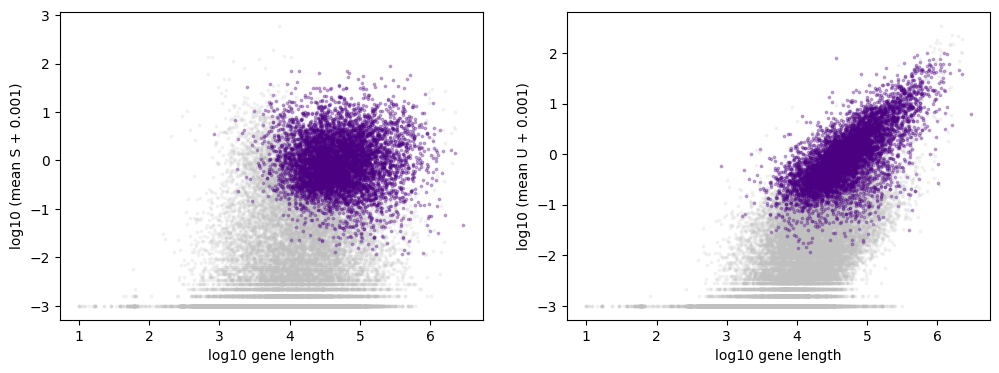

In [11]:
dir_string,dataset_strings = monod.preprocess.construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./monod_demo_fits',meta='allen_noisefree',batch_id=1,\
                                             n_genes=200,exp_filter_threshold=None,creator='gccp',datestring='nodate')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


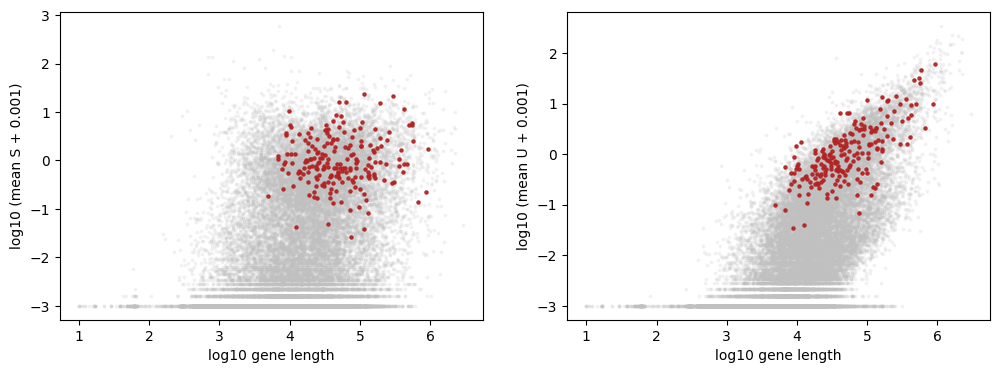

In [12]:
i=0
search_data = monod.extract_data.extract_data(loom_filepaths[i], transcriptome_filepath, dataset_names[i],
                dataset_strings[i], dir_string, dataset_attr_names=attribute_names)


In [13]:
print(dir_string)
print(dataset_strings)


./monod_demo_fits/gccp_nodate_026_allen_noisefree_1
['./monod_demo_fits/gccp_nodate_026_allen_noisefree_1/allen_C01_gaba']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
search_data = monod.analysis.load_search_data(dataset_strings[0]+'/raw.sd')


In [15]:
result_strings = []
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
phys_lb = [-1.0, -1.8, -1.8 ]
phys_ub = [4.2, 2.5, 3.5]
samp_lb = [1,1]
samp_ub = [1,1]
gridsize = [1,1]


In [16]:
i = 0
fitmodel_fq = monod.cme_toolbox.CMEModel('Bursty','None')
fitmodel_qv = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='quad_vec')
# fitmodel_nn = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn')
fitmodel_nn10 = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn_10')

inference_parameters_fq = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_fq,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})
inference_parameters_qv = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_qv,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})
# inference_parameters_nn = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
#             dataset_strings[i],fitmodel_nn,use_lengths = False,
#             gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})
inference_parameters_nn10 = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_nn10,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
grad_inference_fq = monod.inference.GradientInference(inference_parameters_fq, fitmodel_fq, search_data, 0)
grad_inference_qv = monod.inference.GradientInference(inference_parameters_qv, fitmodel_qv, search_data, 0)
# grad_inference_nn = monod.inference.GradientInference(inference_parameters_nn, fitmodel_nn, search_data, 0)
grad_inference_nn10 = monod.inference.GradientInference(inference_parameters_nn10, fitmodel_nn10, search_data, 0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
N=100

In [30]:
gind = 160
samp=None
p=grad_inference_fq.param_MoM[gind]
limits = search_data.M[:,gind]
# limits = search_data.M[:,gind]+100
data = search_data.hist[gind]


In [31]:
search_data.M[:,gind]

array([310,  20])

In [32]:
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'nn10 result')

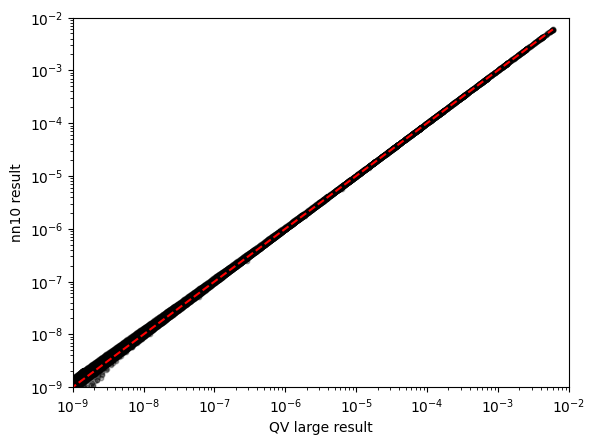

In [34]:
x=fitmodel_qv.eval_model_pss(p, [500,500], samp).flatten()
y=fitmodel_nn10.eval_model_pss(p, [500,500], samp).flatten()
plt.scatter(x,y,10,'k',alpha=0.3)
xl = [x.min(),x.max()]
plt.plot(xl,xl,'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-9,1e-2)
plt.ylim(1e-9,1e-2)
plt.xlabel('QV large result')
plt.ylabel('nn10 result')


Text(0.5, 0, 'QV Large result')

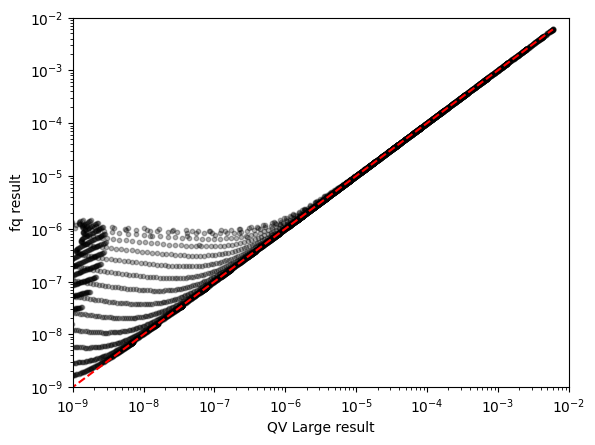

In [37]:
x=fitmodel_qv.eval_model_pss(p, [500,500], samp)
y=fitmodel_fq.eval_model_pss(p, limits, samp).flatten()
plt.scatter(x[:limits[0],:limits[1]].flatten(),y,10,'k',alpha=0.3)
xl = [x.min(),x.max()]
plt.plot(xl,xl,'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-9,1e-2)
plt.ylim(1e-9,1e-2)
plt.ylabel('fq result')
plt.xlabel('QV Large result')


In [38]:
search_data.layers.shape

(2, 200, 1704)

In [39]:
data = search_data.layers[:,gind,:]

In [40]:
hist = search_data.hist[gind]

In [41]:
# hist

-4794.493582909659


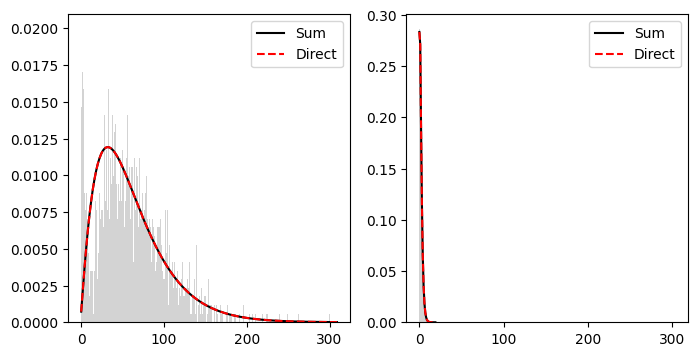

In [42]:
fm = fitmodel_fq

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))

-4794.5050067821185


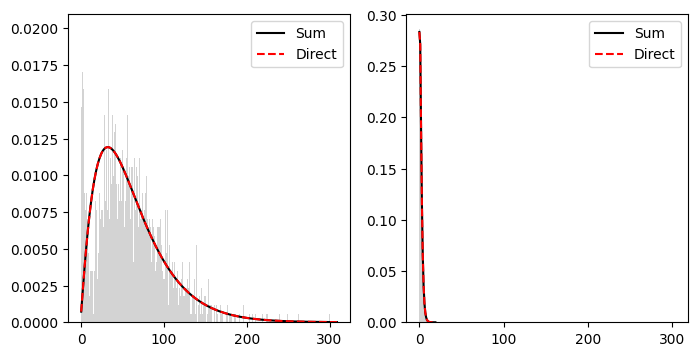

In [43]:
fm = fitmodel_qv

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))

In [44]:
# fm = fitmodel_nn

# fig1,ax1=plt.subplots(1,2,figsize=(8,4))
# bins = np.arange(limits[0]-5)-0.5
# ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
# ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

# Pss = fm.eval_model_pss(p, limits, samp)
# ax1[0].plot(Pss.sum(1),'k-',label='Sum')
# Pss = fm.eval_model_pss(p, [limits[0],1], samp)
# ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
# ax1[0].legend()

# Pss = fm.eval_model_pss(p, limits, samp)
# ax1[1].plot(Pss.sum(0),'k-',label='Sum')
# Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
# ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
# ax1[1].legend()

# print(fm.eval_model_logL(p,limits,samp,hist))

-4795.02233028199


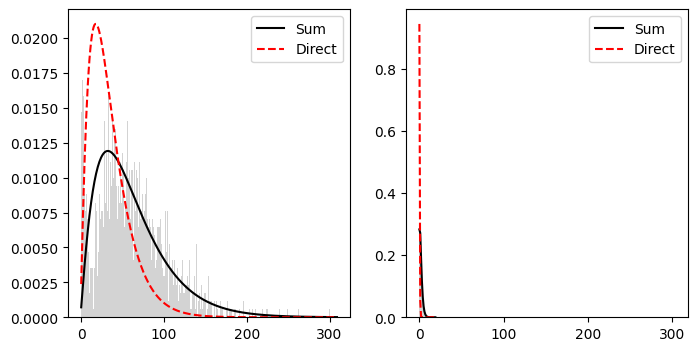

In [45]:
fm = fitmodel_nn10

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))

# Timing

In [49]:
import time 
import copy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
N = 100
t_fq = []
res_fq = []
for i in range(N):
    t1 = time.time()
    res_fq.append(grad_inference_fq.optimize_gene(i,fitmodel_fq,search_data))
    t_fq.append(time.time()-t1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
t_nn10 = []
res_nn10 = []
for i in range(N):

    t1 = time.time()
    res_nn10.append(grad_inference_nn10.optimize_gene(i,fitmodel_fq,search_data))
    t_nn10.append(time.time()-t1)

In [85]:
search_data_hf = copy.deepcopy(search_data)
search_data_hf.M[:,0] += 500
search_data_hf.M[:,0] += 500

In [86]:
t_qv = []
res_qv = []


for i in range(N):
    print(i)
    t1 = time.time()
    res_qv.append(grad_inference_fq.optimize_gene(i,fitmodel_fq,search_data_hf))
    t_qv.append(time.time()-t1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [87]:
t_fq = np.asarray(t_fq)
# t_fq_hf = np.asarray(t_fq_hf)
# t_nn = np.asarray(t_nn)
t_nn10 = np.asarray(t_nn10)
t_qv = np.asarray(t_qv)

pars_fq = np.asarray([x[0] for x in res_fq])
# pars_fq_hf = np.asarray([x[0] for x in res_fq_hf])
pars_qv = np.asarray([x[0] for x in res_qv])
# pars_nn = np.asarray([x[0] for x in res_nn])
pars_nn10 = np.asarray([x[0] for x in res_nn10])

loss_fq = np.asarray([x[1] for x in res_fq])
# loss_fq_hf = np.asarray([x[1] for x in res_fq_hf])
loss_qv = np.asarray([x[1] for x in res_qv])
# loss_nn = np.asarray([x[1] for x in res_nn])
loss_nn10 = np.asarray([x[1] for x in res_nn10])

In [88]:
cmap_quad = ("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d") #greek
cmap_ml = ( "#b86092", "#79ad41", "#4fb6ca", "#178f92", "#d7aca1") # austria, isfahan1 and isfahan2
color_fq = cmap_quad[3]
color_fq_hf = 'magenta'
color_nn = cmap_ml[2]
color_nn10 = cmap_ml[3]
color_qv = cmap_quad[4]
alf=0.5
ms = 30

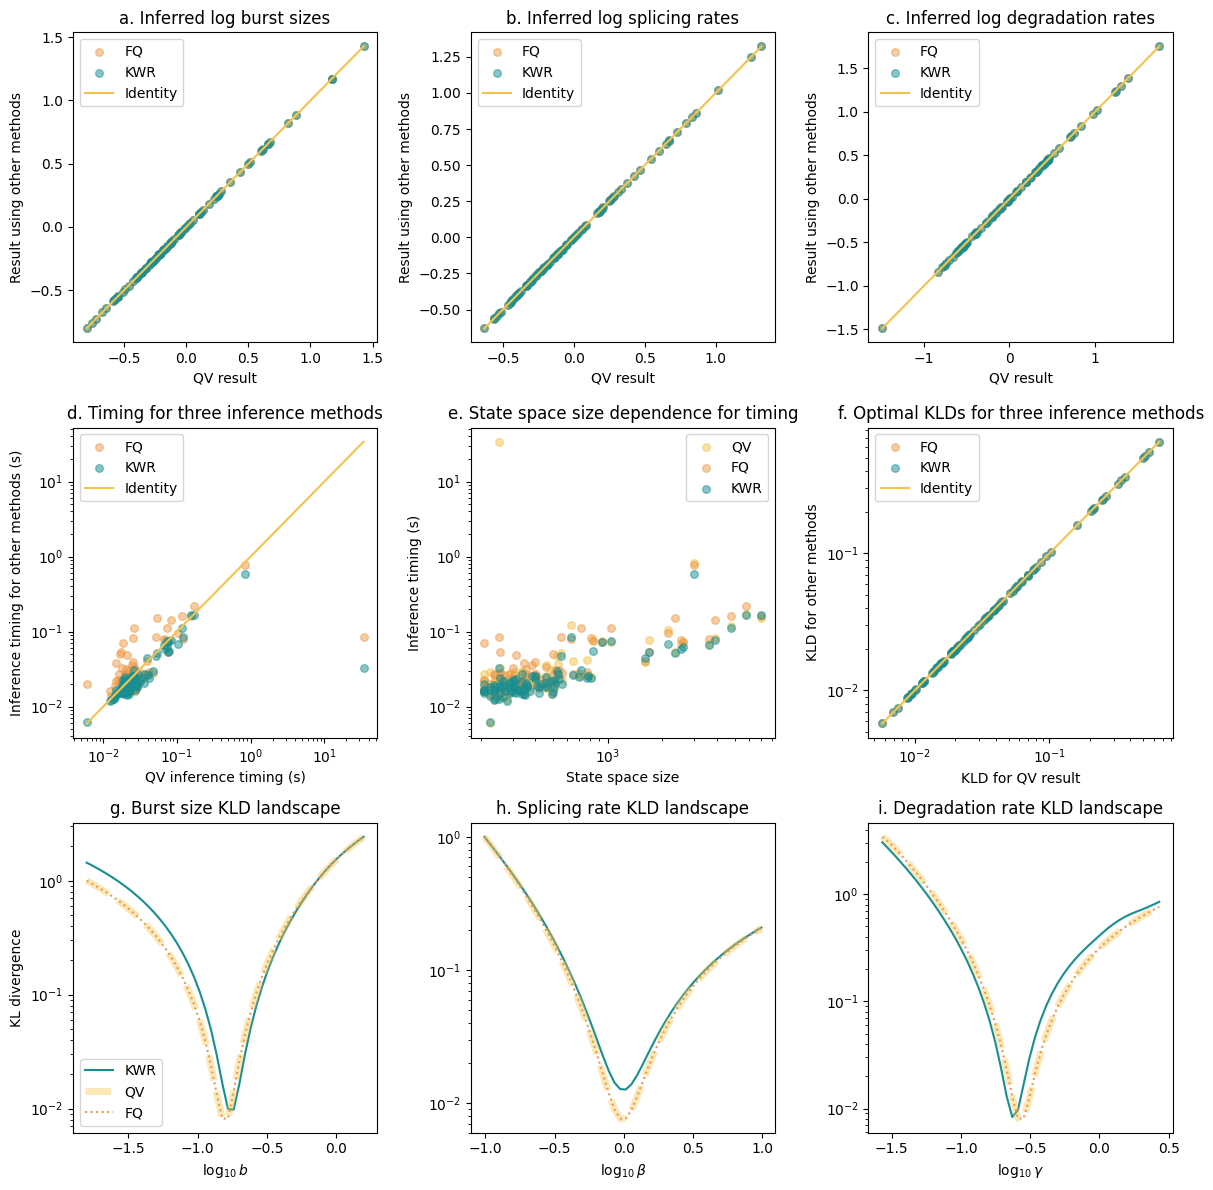

In [89]:
fig1,ax1=plt.subplots(3,3,figsize=(12,12))

for k in range(3):
    ax1[0,k].scatter(pars_qv[:,k],pars_fq[:,k],ms,color_fq,alpha=alf,label='FQ')
    # ax1[0,k].scatter(pars_qv[:,k],pars_nn[:,k],ms,color_nn,alpha=alf,label='nnNB')
    ax1[0,k].scatter(pars_qv[:,k],pars_nn10[:,k],ms,color_nn10,alpha=alf,label='KWR')
#     ax1[0,k].scatter(pars_qv[:,k],pars_fq_hf[:,k],ms,color_fq_hf,alpha=alf,label='FQpad')
    xl = [pars_qv[:,k].min(),pars_qv[:,k].max()]
    ax1[0,k].plot(xl,xl,'-',color=color_qv,label='Identity')
    ax1[0,k].set_xlabel('QV result')
    ax1[0,k].set_ylabel('Result using other methods')
    ax1[0,k].legend()

# k=0 
# lf = np.log10(fanos[0]-1)
# # ax1[0,k].scatter(lf,pars_qv[:,k],ms,color_qv,alpha=alf,label='QV')
# ax1[0,k].scatter(lf,pars_fq[:,k],ms,color_fq,alpha=alf,label='FQ')
# # ax1[0,k].scatter(lf,pars_nn[:,k],ms,color_nn,alpha=alf,label='nnNB')
# ax1[0,k].scatter(lf,pars_nn10[:,k],ms,color_nn10,alpha=alf,label='KWR')
# # ax1[0,k].scatter(lf,np.log10(fanos[0]-1),ms,'k',alpha=alf,label='True')
# xl = [lf.min(),lf.max()]
# # ax1[0,k].scatter(pars_qv[:,k],pars_fq[:,k],ms,color_fq,alpha=alf,label='FQ')
# # ax1[0,k].scatter(pars_qv[:,k],pars_nn10[:,k],ms,color_nn10,alpha=alf,label='KWR')
# # ax1[0,k].scatter(pars_qv[:,k],np.log10(fanos[0]-1),ms,'k',alpha=alf,label='True')
# # xl = [pars_qv[:,k].min(),pars_qv[:,k].max()]
# ax1[0,k].plot(xl,xl,'-',color=color_qv,label='Identity')
# ax1[0,k].set_xlabel('Observed Fano')
# ax1[0,k].set_ylabel('Methods'' fits')
# ax1[0,k].legend()
# k=0
# ax1[0,k].scatter(pars_qv[:,0]-pars_qv[:,1],pars_fq[:,0]-pars_fq[:,1],ms,color_fq,alpha=alf,label='FQ')
# ax1[0,k].scatter(pars_qv[:,0]-pars_qv[:,1],pars_nn10[:,0]-pars_nn10[:,1],ms,color_nn10,alpha=alf,label='KWR')
# ax1[0,k].scatter(pars_qv[:,0]-pars_qv[:,1],np.log10(means[0]),ms,'k',alpha=alf,label='True')
# xl = [(pars_qv[:,0]-pars_qv[:,1]).min(),(pars_qv[:,0]-pars_qv[:,1]).max()]
# ax1[0,k].plot(xl,xl,'-',color=color_qv,label='Identity')
# ax1[0,k].set_xlabel('QV nas mean')
# ax1[0,k].set_ylabel('Result using other methods')
# ax1[0,k].legend()

# k=1
# ax1[0,k].scatter(pars_qv[:,0]-pars_qv[:,2],pars_fq[:,0]-pars_fq[:,2],ms,color_fq,alpha=alf,label='FQ')
# ax1[0,k].scatter(pars_qv[:,0]-pars_qv[:,2],pars_nn10[:,0]-pars_nn10[:,2],ms,color_nn10,alpha=alf,label='KWR')
# ax1[0,k].scatter(pars_qv[:,0]-pars_qv[:,2],np.log10(means[1]),ms,'k',alpha=alf,label='True')
# xl = [(pars_qv[:,0]-pars_qv[:,2]).min(),(pars_qv[:,0]-pars_qv[:,2]).max()]
# ax1[0,k].plot(xl,xl,'-',color=color_qv,label='Identity')
# ax1[0,k].set_xlabel('QV mat mean')
# ax1[0,k].set_ylabel('Result using other methods')
# ax1[0,k].legend()
    
ax1[1,0].scatter(t_qv,t_fq,ms,color_fq,alpha=alf,label='FQ')
# ax1[1,0].scatter(t_qv,t_nn,ms,color_nn,alpha=alf,label='nnNB')
ax1[1,0].scatter(t_qv,t_nn10,ms,color_nn10,alpha=alf,label='KWR')
xl = [t_qv.min(),t_qv.max()]
ax1[1,0].plot(xl,xl,'-',color=color_qv,label='Identity')
ax1[1,0].set_xscale('log')
ax1[1,0].set_yscale('log')
ax1[1,0].set_xlabel('QV inference timing (s)')
ax1[1,0].set_ylabel('Inference timing for other methods (s)')
ax1[1,0].legend()

ss = search_data.M.prod(0)[:N]
ax1[1,1].scatter(ss,t_qv,ms,color_qv,alpha=alf,label='QV')
ax1[1,1].scatter(ss,t_fq,ms,color_fq,alpha=alf,label='FQ')
# ax1[1,1].scatter(ss,t_nn,ms,color_nn,alpha=alf,label='nnNB')
ax1[1,1].scatter(ss,t_nn10,ms,color_nn10,alpha=alf,label='KWR')
ax1[1,1].set_xscale('log')
ax1[1,1].set_yscale('log')
ax1[1,1].set_xlabel('State space size')
ax1[1,1].set_ylabel('Inference timing (s)')
ax1[1,1].legend()

ax1[1,2].scatter(loss_qv,loss_fq,ms,color_fq,alpha=alf,label='FQ')
# ax1[1,2].scatter(loss_qv,loss_nn,ms,color_nn,alpha=alf,label='nnNB')
ax1[1,2].scatter(loss_qv,loss_nn10,ms,color_nn10,alpha=alf,label='KWR')
xl = [loss_qv.min(),loss_qv.max()]
ax1[1,2].plot(xl,xl,'-',color=color_qv,label='Identity')
ax1[1,2].set_xscale('log')
ax1[1,2].set_yscale('log')
ax1[1,2].legend()
ax1[1,2].set_xlabel('KLD for QV result')
ax1[1,2].set_ylabel('KLD for other methods')

gind = 1
param_names = fitmodel_nn10.get_log_name_str()
n_pts = 50
for k in range(3):
    p = pars_nn10[gind]
    domain = p[k] + np.linspace(-1,1,n_pts)
    kld_nn = []
    kld_nn10 = []
    kld_fq = []
    kld_qv = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        
        # kld_nn.append(fitmodel_nn.eval_model_kld(p_, search_data.M[:,gind], "None", search_data.hist[gind]))
        kld_nn10.append(fitmodel_nn10.eval_model_kld(p_, search_data.M[:,gind], "None", search_data.hist[gind]))
        kld_qv.append(fitmodel_qv.eval_model_kld(p_, search_data.M[:,gind], "None", search_data.hist[gind]))
        kld_fq.append(fitmodel_fq.eval_model_kld(p_, search_data.M[:,gind], "None", search_data.hist[gind]))
#     ax1[2,k].plot(domain,kld_nn,'-',color=color_nn,label='nnNB')
    ax1[2,k].plot(domain,kld_nn10,'-',color=color_nn10,label='KWR')
    ax1[2,k].plot(domain,kld_qv,'--',color=color_qv,linewidth=5,alpha=0.4,label='QV')
    ax1[2,k].plot(domain,kld_fq,':',color=color_fq,alpha=1,label='FQ')
    ax1[2,k].set_xlabel(param_names[k])
    ax1[2,k].set_yscale('log')
    if k==0:
        ax1[2,k].legend()
        ax1[2,k].set_ylabel('KL divergence')

ax1[0,0].set_title('a. Inferred log burst sizes')
ax1[0,0].set_title('a. Inferred log burst sizes')
ax1[0,1].set_title('b. Inferred log splicing rates')
ax1[0,2].set_title('c. Inferred log degradation rates')
ax1[1,0].set_title('d. Timing for three inference methods')
ax1[1,1].set_title('e. State space size dependence for timing')
ax1[1,2].set_title('f. Optimal KLDs for three inference methods')
ax1[2,0].set_title('g. Burst size KLD landscape')
ax1[2,1].set_title('h. Splicing rate KLD landscape')
ax1[2,2].set_title('i. Degradation rate KLD landscape')

plt.tight_layout()
# plt.savefig('./figs/monod.png',dpi=450)
# plt.savefig('./figs/monod.pdf')